#### Install Seaborn

In CMD, write the following command and press Enter<br>
pip install seaborn

OR

In jupyter, write the folliwng command and press Run<br>
!pip install seaborn



In [3]:
# !pip install seaborn

#### Seaborn Documentation
https://seaborn.pydata.org/tutorial.html

In [4]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [5]:
df = pd.read_csv('covid.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [6]:
df.shape
# num of rows = 9107
# num of cols = 10

(9107, 10)

In [7]:
df['countries'].value_counts()

countries
Italy                                98
Belgium                              98
China                                98
Canada                               98
Czech_Republic                       98
                                     ..
Bonaire, Saint Eustatius and Saba     5
Malawi                                4
Falkland_Islands_(Malvinas)           3
South_Sudan                           1
Saint_Barthelemy                      1
Name: count, Length: 205, dtype: int64

In [8]:
print(df['countries'].nunique())
df['countries'].unique()

205


array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Cura??ao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritre

In [9]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018'],
      dtype='object')

In [10]:
df['month'].value_counts()

month
3     3815
1     2077
2     1943
4     1205
12      67
Name: count, dtype: int64

In [11]:
df['year'].value_counts()

year
2020    9040
2019      67
Name: count, dtype: int64

In [12]:
df.isnull().sum()

date                     0
day                      0
month                    0
year                     0
cases                    0
deaths                   0
countries                0
geoId                   23
countryterritoryCode    84
popData2018             36
dtype: int64

In [15]:
r1 = df['month'].value_counts().reset_index()
print(type(r1))
r1

<class 'pandas.core.frame.DataFrame'>


,month,count
0,3,3815
1,1,2077
2,2,1943
3,4,1205
4,12,67


### Bar Chart

sns.barplot(x,y,hue,color)

x - Value to be dispalyed on x-axis<br>
y - Value to be displayed on y-axis<br>
hue - feature that decides the color<br>
color - color of the bars<br>

#### Depict Month Count on a bar chart using seaborn

<Axes: xlabel='month', ylabel='count'>

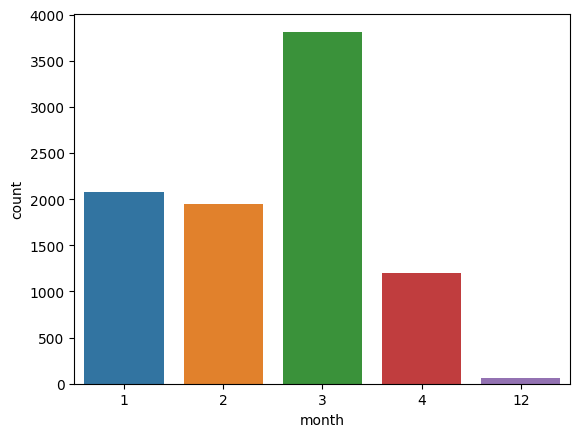

In [16]:
# Method - 1
sns.barplot(x=r1['month'],y=r1['count'])

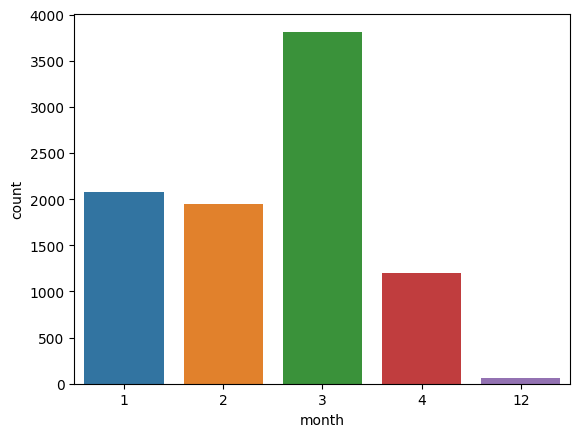

In [18]:
# Method - 2
sns.barplot(data=r1,x='month',y='count')
plt.show()

### Styling BarPlots

#### Plot month wise mean of cases on a barplot for Mar and Apr for India, Belgium, Russia and Australia

In [19]:
df_4c = df[ (df['countries'].isin(['India','Belgium','Russia','Australia'])) & (df['month'].isin([3,4]))]
df_4c.shape
# num of rows = 142
# num of cols = 10

(142, 10)

In [20]:
df_4c['countries'].value_counts()

countries
Australia    37
Belgium      37
India        36
Russia       32
Name: count, dtype: int64

In [21]:
df_4c['month'].value_counts()

month
3    118
4     24
Name: count, dtype: int64

In [22]:
r2 = df_4c.groupby(['month'])['cases'].mean()
r2

month
3    165.355932
4    639.500000
Name: cases, dtype: float64

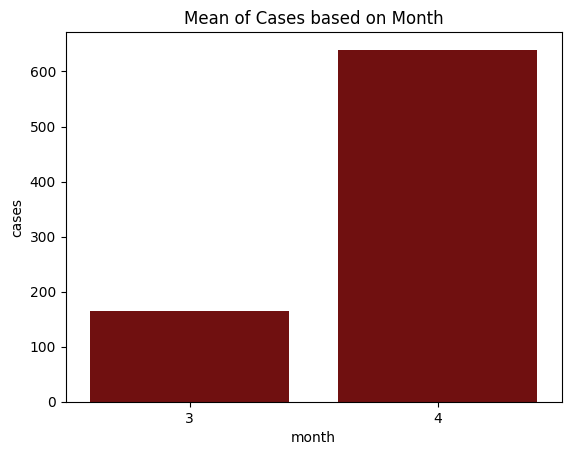

In [23]:
sns.barplot(data=df_4c,x ='month',y='cases',errorbar=None,color='maroon')#ci=None
plt.title('Mean of Cases based on Month')
plt.show()

In [24]:
r3 = df_4c.groupby(['month','countries'])['cases'].mean()
print(type(r3))
r3

<class 'pandas.core.series.Series'>


month  countries
3      Australia     146.193548
       Belgium       383.806452
       India          41.600000
       Russia         70.538462
4      Australia     197.833333
       Belgium      1298.666667
       India         469.333333
       Russia        592.166667
Name: cases, dtype: float64

In [25]:
print(r3.index)
print(r3.values)

MultiIndex([(3, 'Australia'),
            (3,   'Belgium'),
            (3,     'India'),
            (3,    'Russia'),
            (4, 'Australia'),
            (4,   'Belgium'),
            (4,     'India'),
            (4,    'Russia')],
           names=['month', 'countries'])
[ 146.19354839  383.80645161   41.6          70.53846154  197.83333333
 1298.66666667  469.33333333  592.16666667]


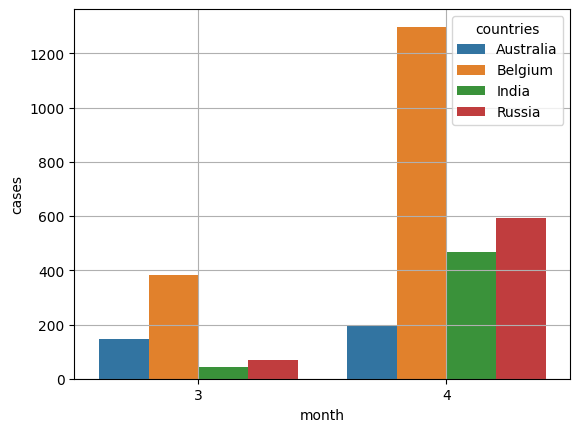

In [26]:
sns.barplot(data=df_4c, x='month',y= 'cases',hue='countries',errorbar=None)#ci=None
plt.grid()
plt.show()
# 3      Australia     146.193548
#        Belgium       383.806452
#        India          41.600000
#        Russia         70.538462

### Line Chart

plt.lineplot(x,y,hue,color,style,markers)<br>
x - data(column to be represented on x-axis<br>
y - data(column to be represented on y-axis<br>
color - color of the lines<br>
hue - the column used for grouping. The criteria that decides the color of th line<br>
markers - True or False<br>
style - column based on which markers will be displayed<br>

#### Plot month wise mean of cases on a lineplot for 2020

In [27]:
df_2020 = df[df['year']==2020]
df_2020.shape

(9040, 10)

In [30]:
df_2020 = df.groupby('month')[['cases']].mean()
df_2020

,cases
month,
1,4.717862
2,38.794133
3,181.544692
4,387.240664
12,0.402985


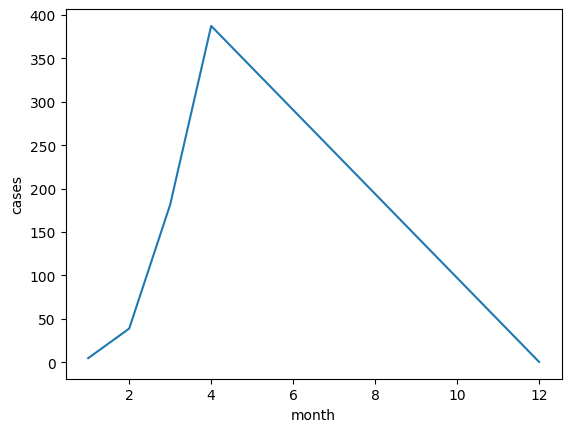

In [32]:
sns.lineplot(data=df_2020, x='month',y= 'cases',errorbar=None)
plt.show()

### Styling LinepLots

#### Plot month vs mean of cases on a lineplot based on Countries - India, Belgium, Russia and Australia

In [39]:
df_4c = df[df['countries'].isin(['India','Belgium','Russia','Australia'])]
df_4c.shape
df_4c.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
414,4/6/2020,6,4,2020,57,2,Australia,AU,AUS,24992369.0
415,4/5/2020,5,4,2020,139,4,Australia,AU,AUS,24992369.0
416,4/4/2020,4,4,2020,324,7,Australia,AU,AUS,24992369.0
417,4/3/2020,3,4,2020,248,2,Australia,AU,AUS,24992369.0
418,4/2/2020,2,4,2020,269,1,Australia,AU,AUS,24992369.0


In [40]:
df_4c['countries'].value_counts()

countries
Australia    98
Belgium      98
India        97
Russia       93
Name: count, dtype: int64

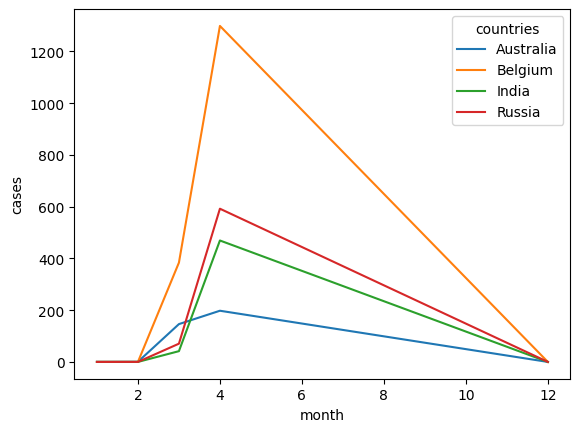

In [41]:
sns.lineplot(data=df_4c, x='month',y= 'cases',hue='countries',errorbar=None)
plt.show()

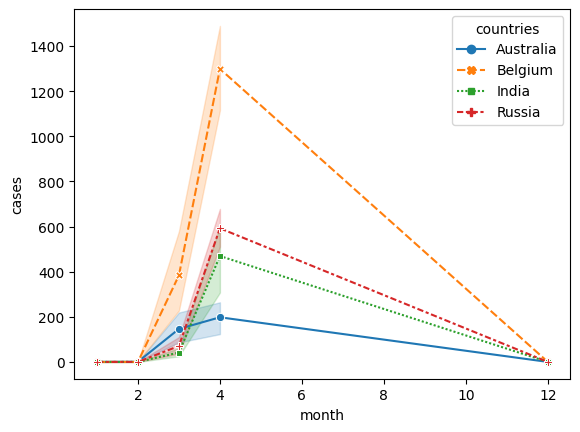

In [42]:
sns.lineplot(data=df_4c, x='month',y= 'cases',hue='countries',
             style='countries',markers=True)
plt.show()

In [43]:
df['geoId'].nunique()

204

In [44]:
print(df['countryterritoryCode'].nunique())
# df['countryterritoryCode'].value_counts()

200


In [45]:
r1 = df['month'].value_counts().reset_index()
r1

,month,count
0,3,3815
1,1,2077
2,2,1943
3,4,1205
4,12,67


In [46]:
sns.barplot(data=r1,x='index',y='month')

ValueError: Could not interpret input 'index'

#### Using Matplotlib with Seaborn

1) <b>xlabel() and ylabel()</b><br>
Used to label x-axis  and y-axis.

2) <b>title()</b><br>
Used to provide chart title

3) <b>show()</b><br>
Used to hide unecessary details

4) <b>xticks() and yticks()</b><br>
Used to change the ticks values. Also used to set rotation

5) <b>plt.figure(figsize=(x,y))</b><br>
Used to set the figure height and width    

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(data=r1,x='index',y='month')
plt.title('Count of Months',fontsize=14,color='blue')
plt.xlabel('Months',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

ValueError: Could not interpret input 'index'

<Figure size 700x500 with 0 Axes>

### Seaborn Chart Customization

<b>1) Figure Size</b>

sns.set(rc = {'figure.figsize':(height,width)}

rc = run command

#### Plot Country wise Population for top 7 countries with highest population

In [48]:
print(len(df['popData2018'].unique()))
print(len(df['countries'].unique()))

201
205


In [49]:
data = df[['countries','popData2018']]
data.duplicated().sum()

8902

In [50]:
data = data.drop_duplicates()

In [51]:
print(data.shape)
# num of rows = 205
# num of cols = 2

(205, 2)


In [52]:
data.head()

,countries,popData2018
0,Afghanistan,37172386.0
88,Albania,2866376.0
117,Andorra,77006.0
130,Algeria,42228429.0
234,Angola,30809762.0


In [53]:
top7_pop = data.sort_values('popData2018',ascending=False).head(7)
top7_pop

,countries,popData2018
1763,China,1.392730e+09
3820,India,1.352617e+09
8798,United_States_of_America,3.271674e+08
3917,Indonesia,2.676634e+08
6503,Pakistan,2.122150e+08
1187,Brazil,2.094693e+08
6130,Nigeria,1.958747e+08


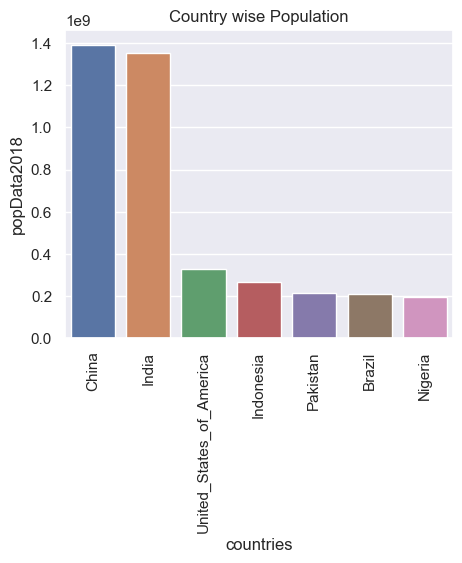

In [54]:
sns.set(rc={'figure.figsize':(5,4)})

sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

<b>2) Scaling</b>

Seaborn has four presets which set the size of the plot and allow you to customize your figure depending on how it will be presented.

In order of relative size they are: paper, notebook, talk, and poster

<b> 3) Styling</b><br>
    
We can set the style to white, whitegrid, darkgrid, dark

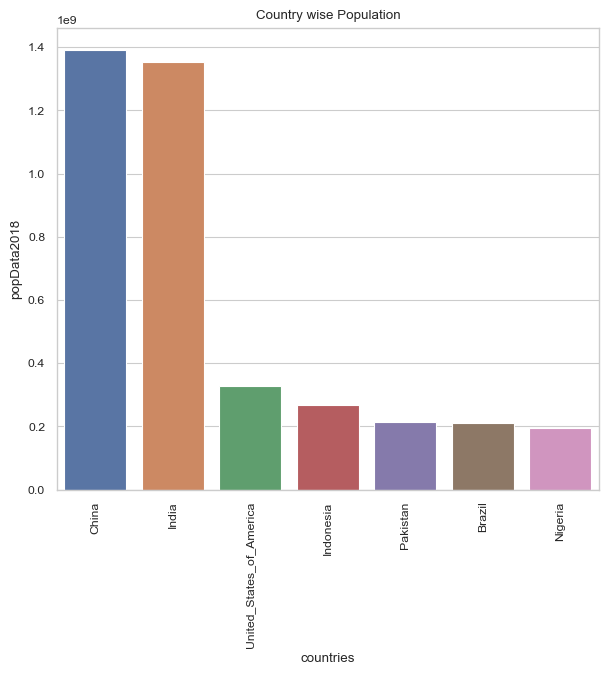

In [55]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_style('whitegrid')
sns.set_context("paper")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

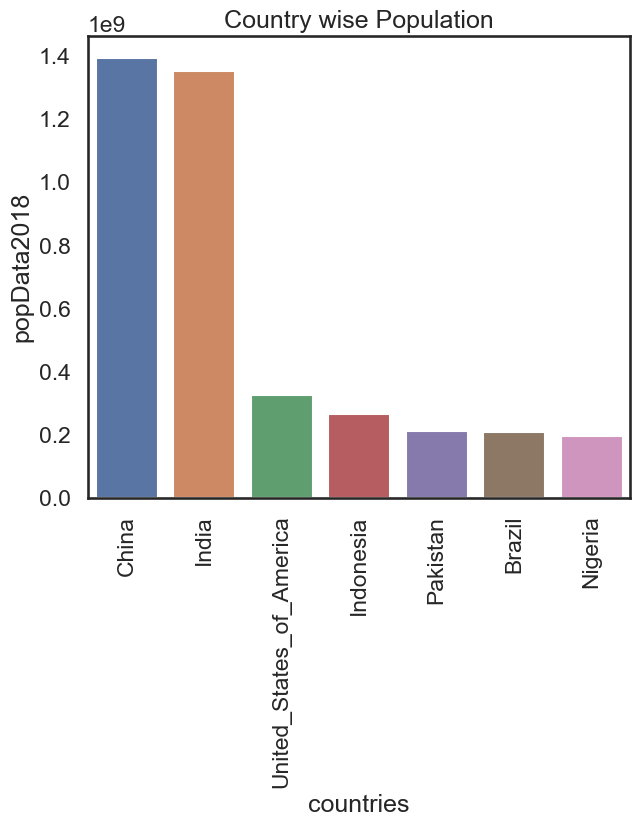

In [56]:
sns.set_style('white')
sns.set_context("talk")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

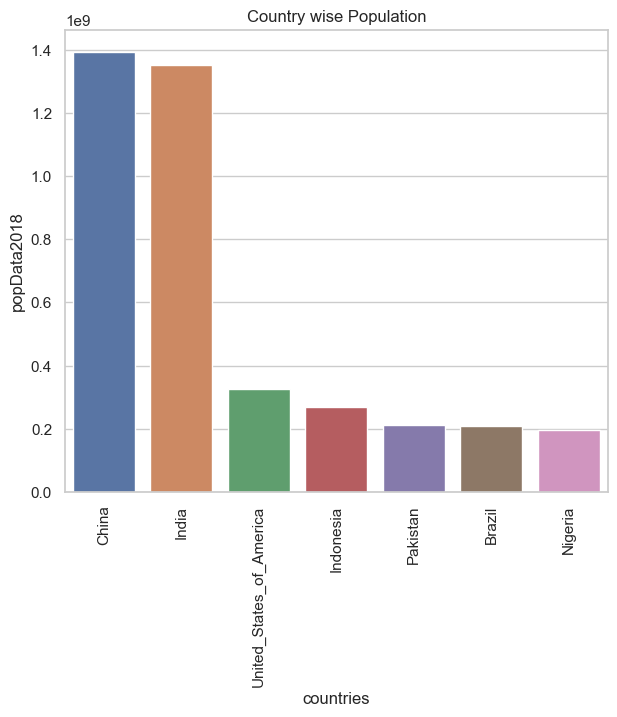

In [57]:
sns.set_style('whitegrid')
sns.set_context("notebook")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

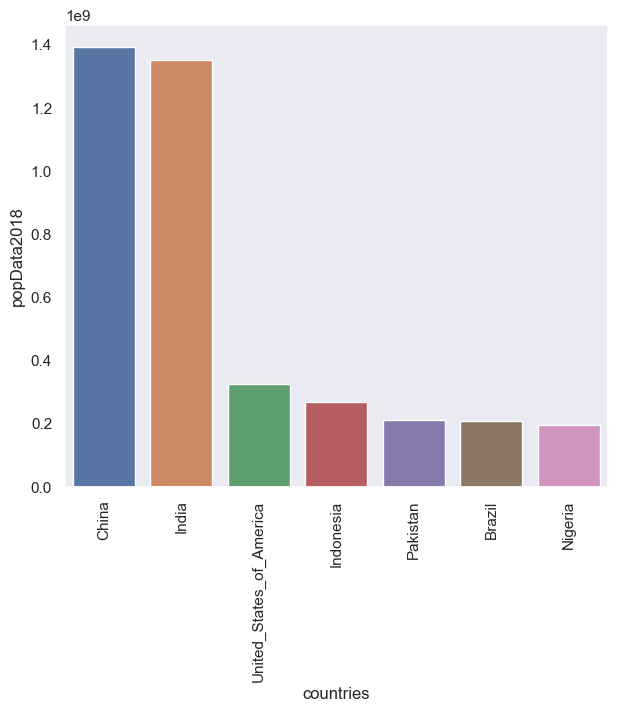

In [58]:
sns.set_style('dark')
sns.set_context("notebook")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

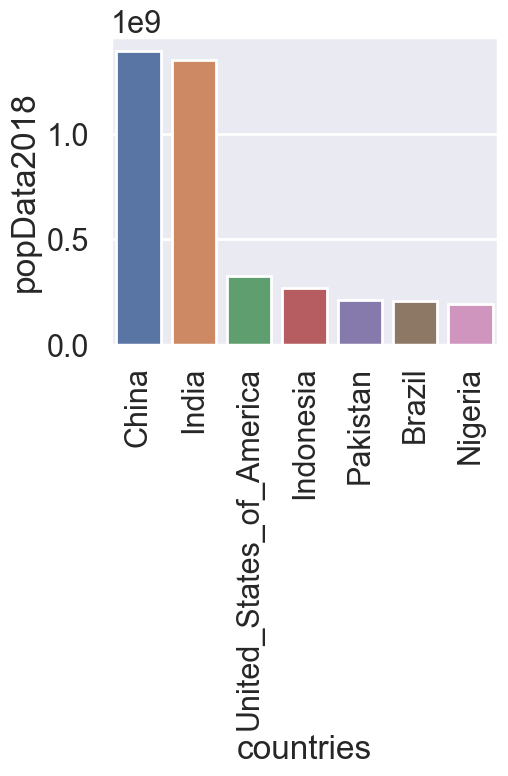

In [59]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('darkgrid')
sns.set_context("poster")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

<b> 4) Scaling Fonts and Line Widths</b><br>
Example<br>
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


<b> 5) Styling</b><br>
    
We can set the style to white, whitegrid, darkgrid, dark

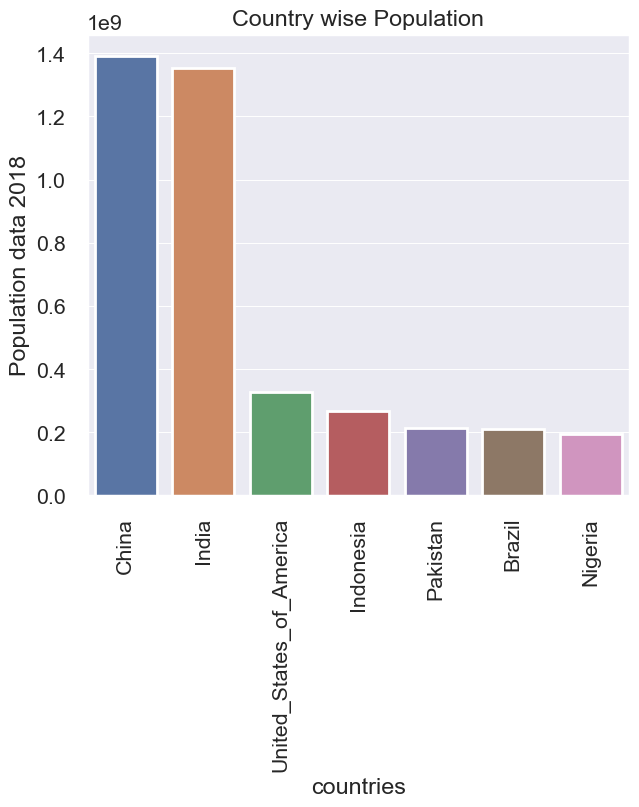

In [60]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.7})
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.ylabel('Population data 2018')
plt.xticks(rotation=90)
plt.show()

<b>6) Color_palette</b>

sns.color_palette()


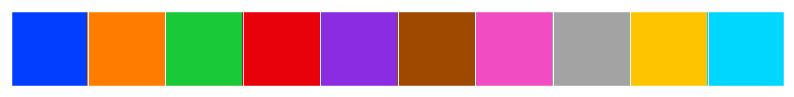

In [61]:
pal1 = sns.color_palette("bright")
sns.palplot(pal1) # paplette plot

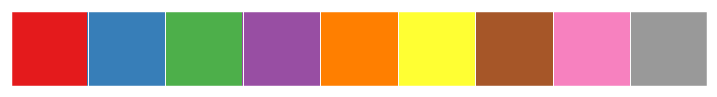

In [62]:
pal2 = sns.color_palette("Set1")  # Set2, Set3
sns.palplot(pal2)

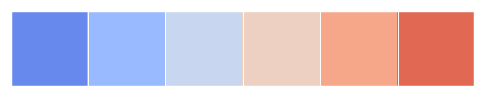

In [63]:
pal3 = sns.color_palette("coolwarm")
sns.palplot(pal3)

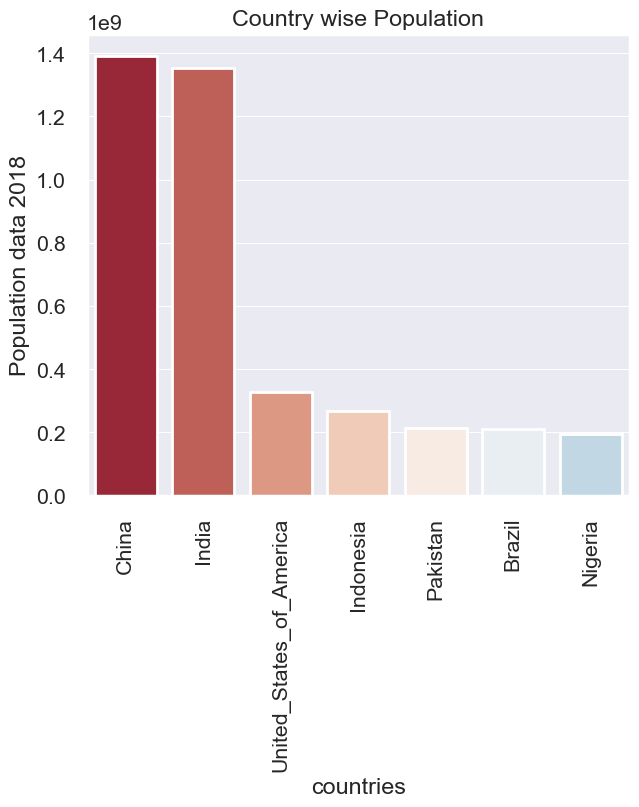

In [64]:
sns.set_palette("RdBu",10)
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.ylabel('Population data 2018')
plt.xticks(rotation=90)
plt.show()

#### 7) Spines
In addition to changing the color background, you can also define the usage of spines. Spines are the borders of the figure that contain the visualization. By default, an image has four spines.

You may want to remove some or all of the spines for various reasons. A figure with the left and bottom spines resembles traditional graphs. You can automatically take away the top and right spines using the sns.despine()function

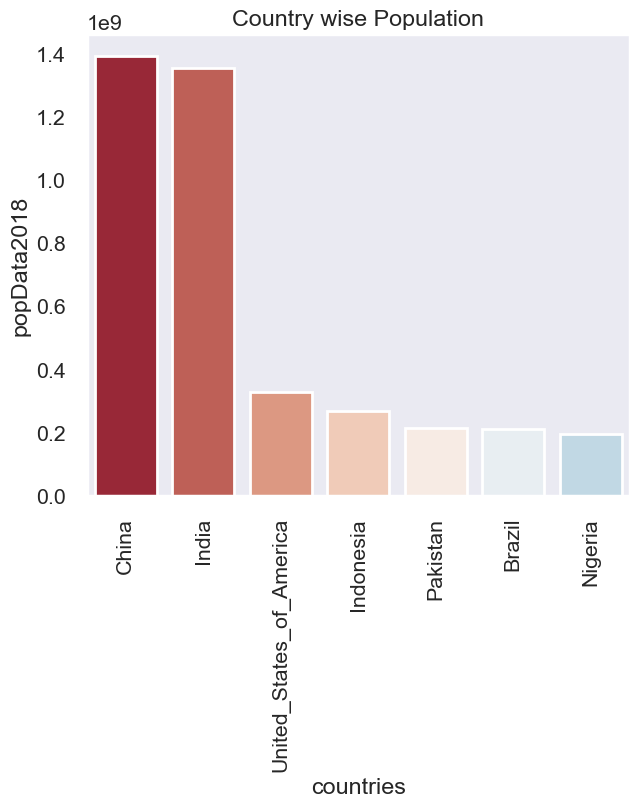

In [65]:
sns.set_style('dark')
# sns.set_context("talk")
sns.despine()
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

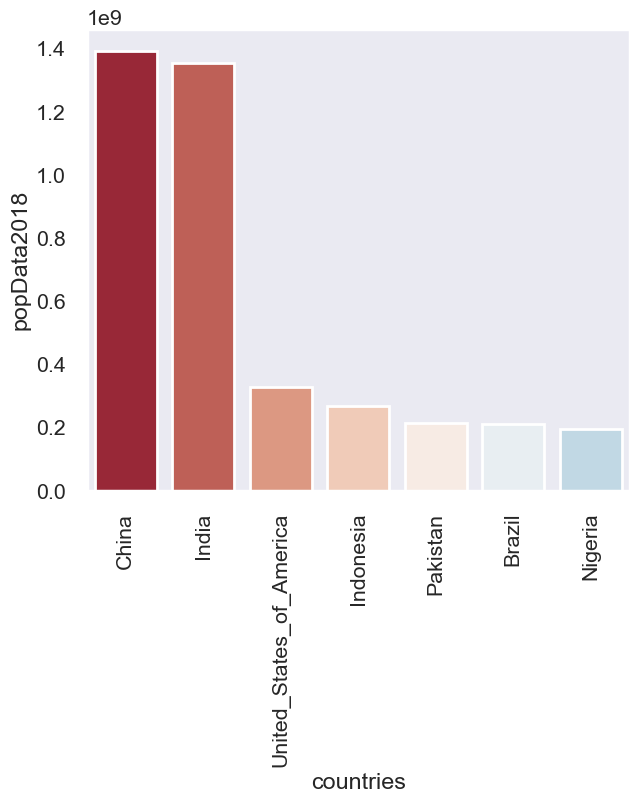

In [66]:
# sns.set_style("whitegrid")
sns.despine()
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

#### Multiple Plots

In [67]:
df_3c = df[df['countries'].isin(['India','Russia','Belgium'])]
df_3c.shape

(288, 10)

In [68]:
df_3c.head(4)

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
951,4/6/2020,6,4,2020,1260,164,Belgium,BE,BEL,11422068.0
952,4/5/2020,5,4,2020,1661,140,Belgium,BE,BEL,11422068.0
953,4/4/2020,4,4,2020,1422,132,Belgium,BE,BEL,11422068.0
954,4/3/2020,3,4,2020,1384,183,Belgium,BE,BEL,11422068.0


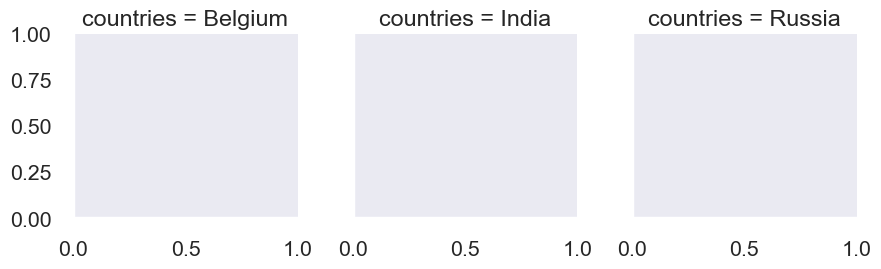

In [69]:
sea = sns.FacetGrid(df_3c, col = "countries")

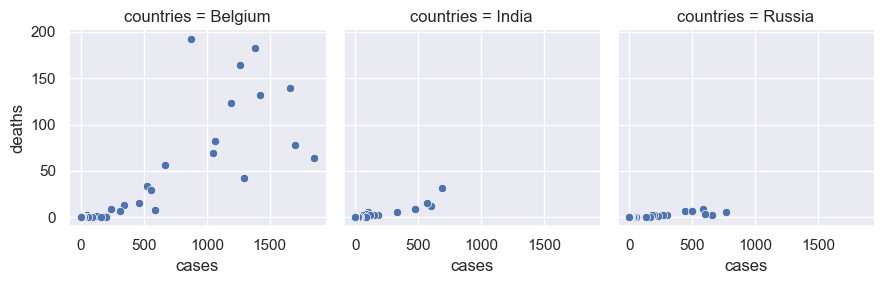

In [70]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('darkgrid')
sns.set_context("notebook")
sea = sns.FacetGrid(df_3c, col = "countries")
sea.map(sns.scatterplot, "cases", "deaths")
plt.show()

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


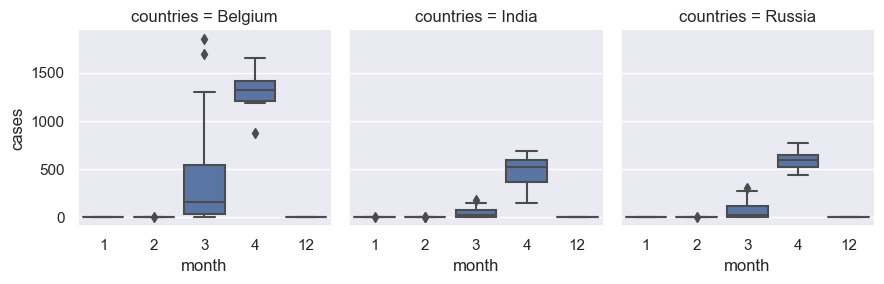

In [71]:
sea = sns.FacetGrid(df_3c, col = "countries")
sea.map(sns.boxplot, 'month','cases')
plt.show()

In [72]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [73]:
df.dtypes.value_counts()

int64      5
object     4
float64    1
Name: count, dtype: int64

In [74]:
# converting date to datetime data type
df['date'] = pd.to_datetime(df['date'])  

In [75]:
df.dtypes

date                    datetime64[ns]
day                              int64
month                            int64
year                             int64
cases                            int64
deaths                           int64
countries                       object
geoId                           object
countryterritoryCode            object
popData2018                    float64
dtype: object

In [76]:
# Extracting Quarter from the date column (which has been converted to datetime datatype) 
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [77]:
print(df.columns)
print(df.shape)

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')
(9107, 11)


In [78]:
df['qtr'].value_counts()

qtr
1    7835
2    1205
4      67
Name: count, dtype: int64

### Scatterplot
1) Scatter plots are the graphs that present the relationship between two continuous variables in a data-set.<br>
2) It is used to determine the covariance or the correaltion between two variables.

Syntax<br>
<b>sns.scatterplot(data,x,y,hue,size,palette)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column that determines the colors(column which will be used to group the data)<br>
size - column that determines the size of the markers used in scatterplot<br>
palette - determines the color palette used for coloring the markers of sctterplot<br>

#### Plot a scatter Chart between Cases and Deaths using seaborn

In [79]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

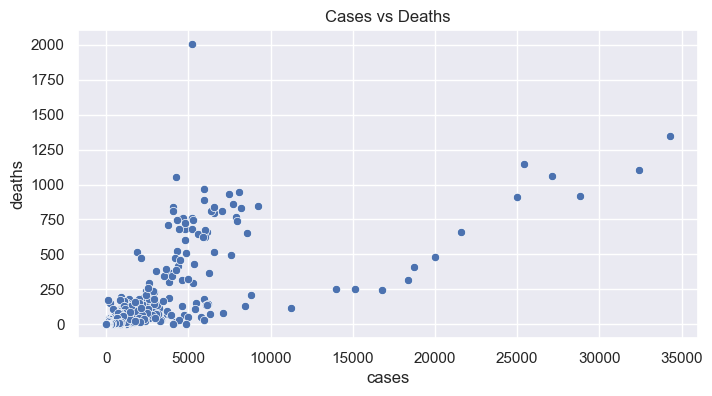

In [80]:
sns.scatterplot(data=df,x='cases',y='deaths')
plt.title('Cases vs Deaths')
plt.show()

#### Plot a scatter Chart between Cases and Deaths based on month

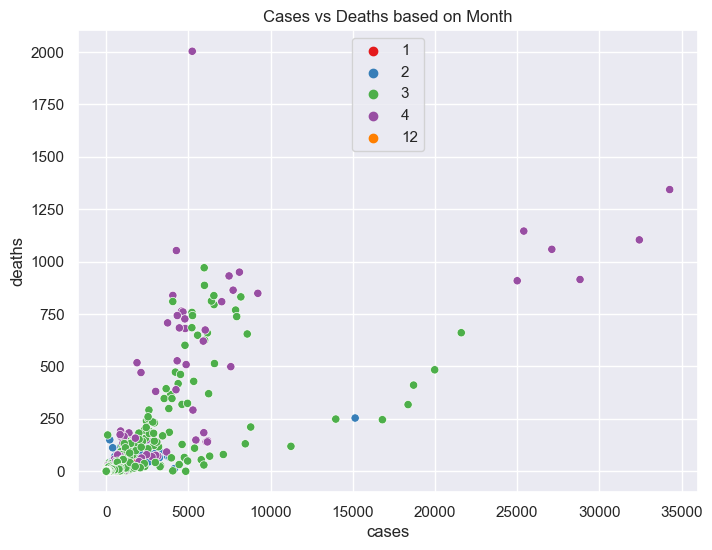

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',palette='Set1')
plt.title('Cases vs Deaths based on Month')
plt.legend(loc=9)
plt.show()

#### Plot a scatter Chart between Cases and Deaths based on month where size of the scatter plot is based on cases

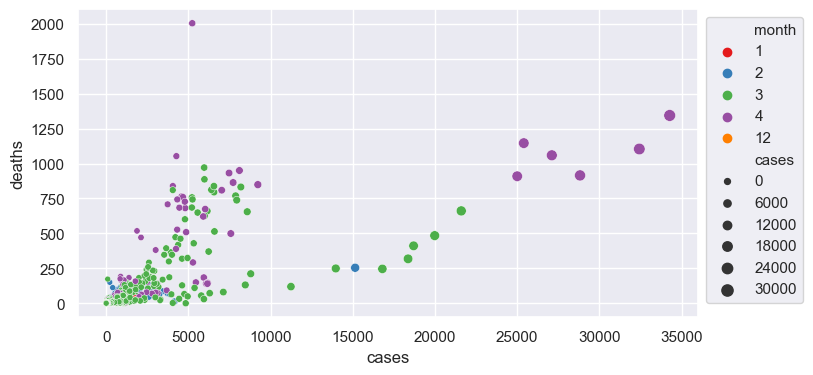

In [82]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',
                palette='Set1',size='cases')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Boxplot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. 

Q1: 25 percentile<br>
Q2: 50 percentile (Medium)<br>
Q3: 75 percentile<br>
min: Q1 - 1.5 * IQR<br>
max: Q3 + 1.5 * IQR<br>
IQR: Inter Quartile Range: Q3 - Q1<br>

Syntax<br>
<b>sns.boxplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(column that is used for grouping)<br>

#### Plot month wise boxplot for covid cases for India for Mar and Apr

In [83]:
# Filtering the dataframe where theCountry is India and month is either Mar or Apr
df_india = df[(df['countries']=='India') & (df['month'].isin([3,4]))]
df_india.shape

(36, 11)

In [84]:
df_india['countries'].value_counts()

countries
India    36
Name: count, dtype: int64

In [85]:
df_india['month'].value_counts()

month
3    30
4     6
Name: count, dtype: int64

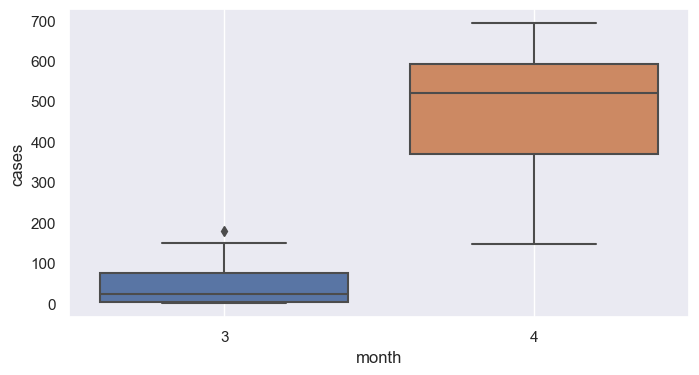

In [86]:
sns.boxplot(data=df_india,x='month',y='cases')
plt.grid()
plt.show()

#### Plot boxplot for the number of cases for the countries Belgium, South_Africa, Argentina, Portugal, Switzerland

In [87]:
clist = ['Belgium','South_Africa','Argentina','Portugal','Switzerland']
df_5c = df[df['countries'].isin(clist)]
df_5c.shape

(292, 11)

In [88]:
df_5c['countries'].value_counts()

countries
Belgium         98
Switzerland     98
Portugal        35
Argentina       31
South_Africa    30
Name: count, dtype: int64

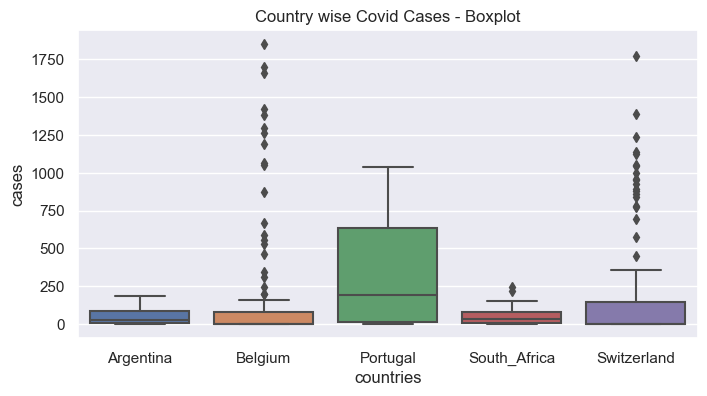

In [89]:
sns.boxplot(data=df_5c,x='countries',y='cases')
plt.title('Country wise Covid Cases - Boxplot')
plt.show()

#### Plot boxplot for the number of cases for Portugal

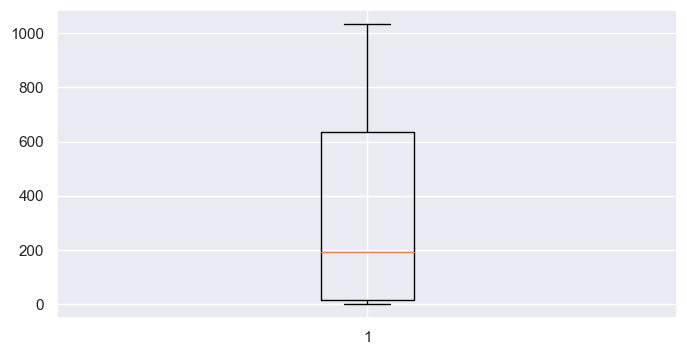

In [90]:
df_port = df[df['countries']=='Portugal']

plt.boxplot(data=df_port,x='cases')
plt.show()

#### Plot boxplot for the number of cases for Poland

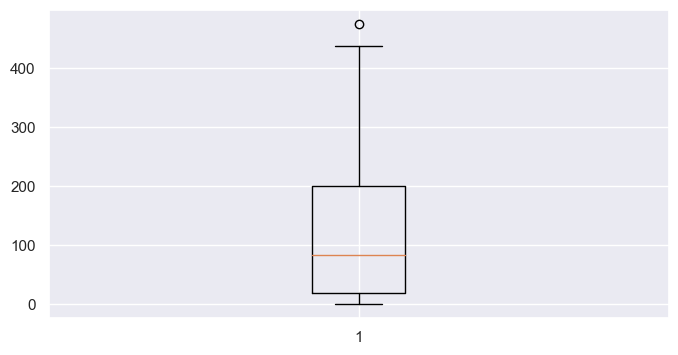

In [91]:
df_pol = df[df['countries']=='Poland']

plt.boxplot(data=df_pol,x='cases')
plt.show()

In [92]:
r1 = df.groupby(['countries'])['cases'].sum().reset_index()
r1[r1['cases'].between(200,400)]

,countries,cases
0,Afghanistan,299
1,Albania,361
31,Burkina_Faso,345
46,Cote_dIvoire,261
48,Cuba,320
75,Ghana,214
88,Honduras,298
102,Jordan,345
107,Kyrgyzstan,216
121,Malta,234


#### Plot boxplot for the number for cases the countries Albania, San_Marino, Vietnam, Oman, Taiwan

In [93]:
clist = ['Albania','San_Marino','Vietnam','Oman','Taiwan']

df_r1 = df[df['countries'].isin(clist)]
df_r1.shape

(408, 11)

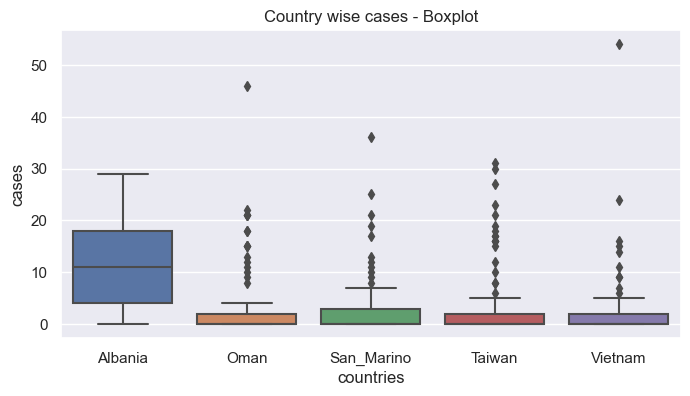

In [94]:
sns.boxplot(data=df_r1,x='countries',y='cases')
plt.title('Country wise cases - Boxplot')
plt.show()

### ViolinPlot
1) Violinplot is a combination of boxplot and KDE(Kernel Density Estimate)<br>
2) A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.<br> 
3) It is used to visualize the distribution of numerical data.<br>
4) Violinplots are symmetrical<br>

Syntax<br>
<b>sns.violinplot(data,x,y, hue, split)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used of grouping)<br>
split - used only when hue parameter has 2 catgories. It splits the violinplot in 2 different halves<br>

#### Plot month wise violinplot for covid cases for India for Mar and Apr

In [95]:
print(df_india['countries'].value_counts())  # India
print(df_india['month'].value_counts())  # 3,4

countries
India    36
Name: count, dtype: int64
month
3    30
4     6
Name: count, dtype: int64


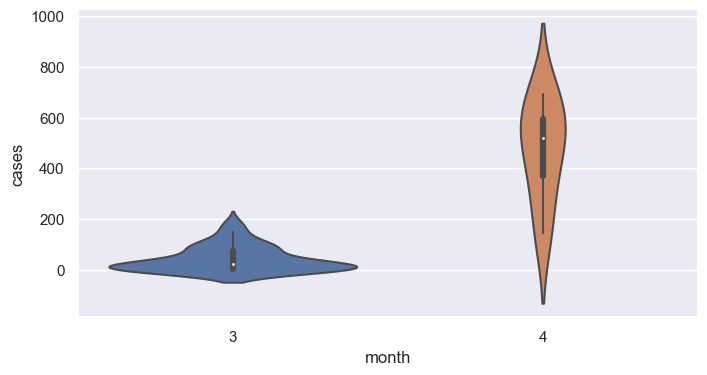

In [96]:
sns.violinplot(data=df_india,x='month',y='cases')
plt.show()

#### Plot violinplot for the number of cases for Countries Switzerland, Belgium, Portugal, Argentina, South_Africa

In [97]:
df_5c['countries'].value_counts()

countries
Belgium         98
Switzerland     98
Portugal        35
Argentina       31
South_Africa    30
Name: count, dtype: int64

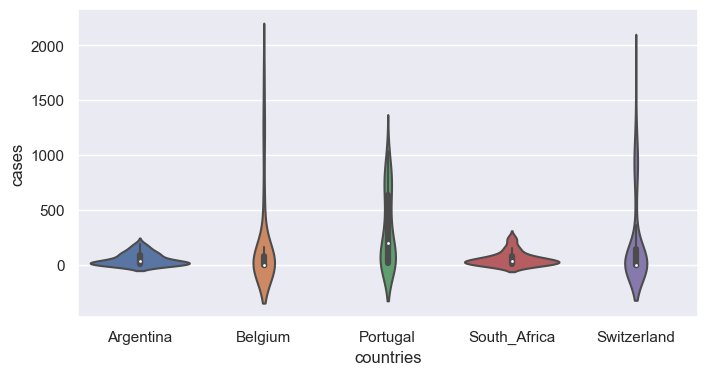

In [98]:
sns.violinplot(data=df_5c,x='countries',y='cases')
plt.show()

In [99]:
# df_5c["month"].value_counts()
df_ma = df_5c[df_5c['month'].isin([3,4])]
df_ma.shape

(170, 11)

#### Plot violinplot for the number of cases for Countries Switzerland, Belgium, Portugal, Argentina, South_Africa sing hue paramter as Month. For the months Mar and Apr

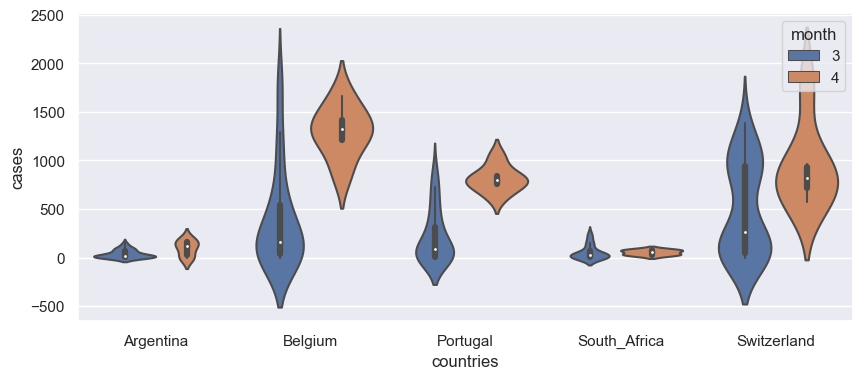

In [100]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month')
plt.show()

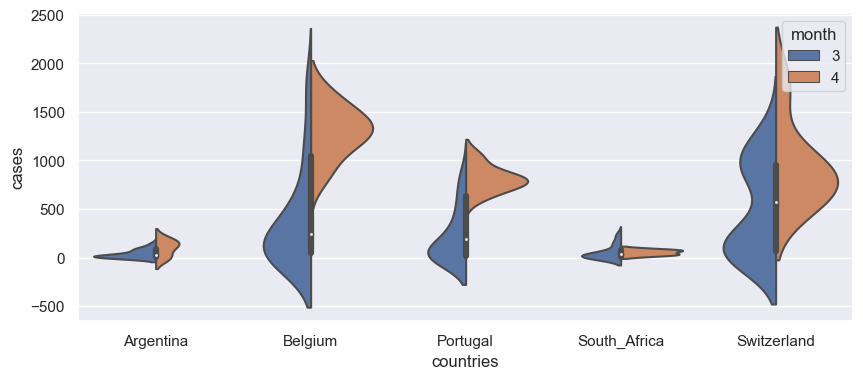

In [101]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month',split=True)
plt.show()

In [102]:
# Extracting the Quarter related informtaion from the date column
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [103]:
df['qtr'].value_counts()

qtr
1    7835
2    1205
4      67
Name: count, dtype: int64

In [104]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

### Strip Plot
1) A strip plot is a graphical data anlysis technique for summarizing a univariate data set.<br>
2) Scatter chart type reprsentation using differet strips, where each strip represents a different category<br>

Syntax<br>
<b>sns.stripplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to decide the colors(used is for grouping)<br>

#### Plot a stripplot representing Cases for India, Belgium and Russia

In [105]:
df_3c = df[df['countries'].isin(['India','Belgium','Russia'])]
df_3c.shape

(288, 11)

In [106]:
df_3c['countries'].value_counts()

countries
Belgium    98
India      97
Russia     93
Name: count, dtype: int64

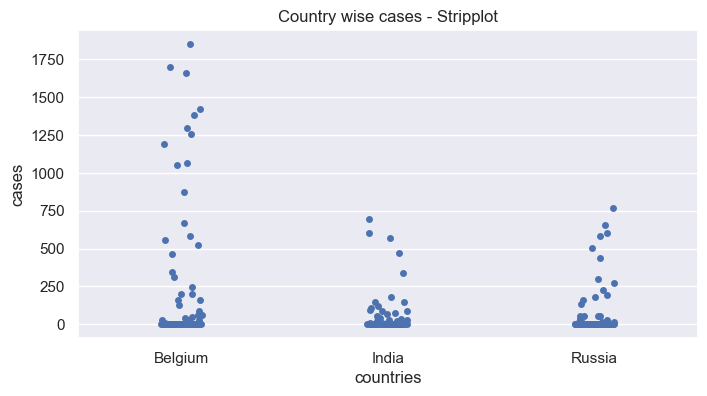

In [107]:
sns.stripplot(data=df_3c,x='countries',y='cases')
plt.title('Country wise cases - Stripplot')
plt.show()

#### Plot a stripplot representing Cases for India, Belgium and Russia based on month. Use month as legend

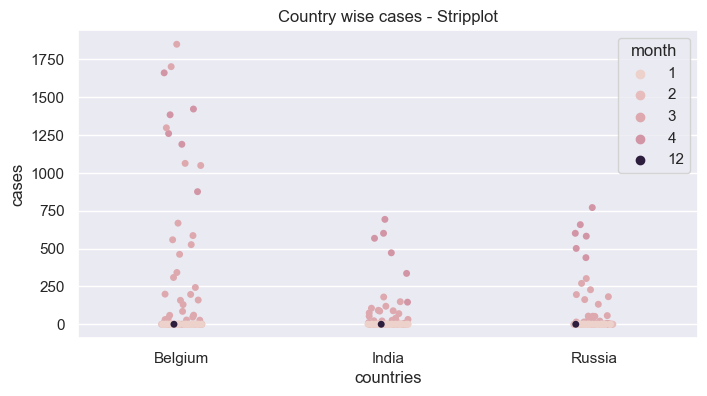

In [108]:
sns.stripplot(data=df_3c,x='countries',y='cases',hue='month')
plt.title('Country wise cases - Stripplot')
plt.show()

### SwarmPlot
A swarm plot is a type of scatter plot that is used for representing categorical values. It is very similar to the strip plot, but it avoids the overlapping of points.

Syntax<br>
<b>sns.swarmplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to decide the colors(Used for grouping)<br>

#### Plot a swarmplot representing Cases for India, Belgium and Russia

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

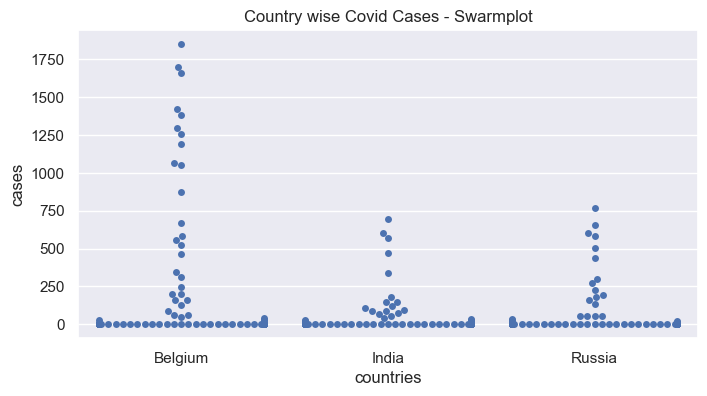

In [109]:
sns.swarmplot(data=df_3c,x='countries',y='cases')
plt.title('Country wise Covid Cases - Swarmplot')
plt.show()

#### Plot a swarmplot representing Cases for India, Belgium and Russia based on month. Where month is used as hue parameter

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

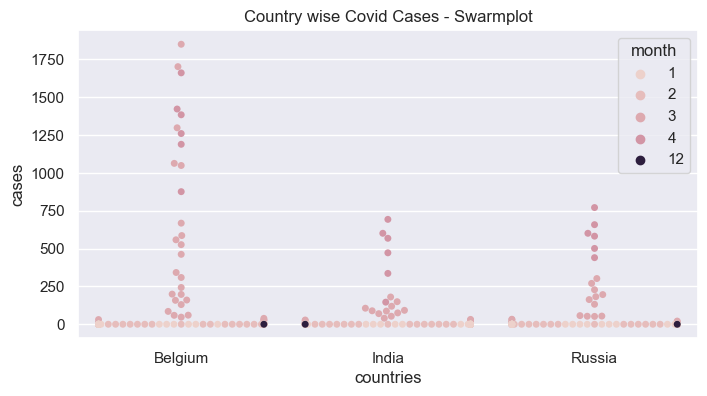

In [110]:
sns.swarmplot(data=df_3c,x='countries',y='cases',hue='month')
plt.title('Country wise Covid Cases - Swarmplot')
plt.show()

### Displot

1) Represents the histgram (freqeuncy distribution)

Syntax<br>
<b>sns.displot(data,x,y,hue,kind)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>
kind - can be set to kde<br>

#### Plot displot for the month of Mar and Apr for India, Belgium and Russia

In [111]:
df_3c['countries'].value_counts()

countries
Belgium    98
India      97
Russia     93
Name: count, dtype: int64

In [112]:
df_3c_mar_apr = df_3c[df_3c['month'].isin([3,4])] # month is Mar or Apr
df_3c_mar_apr.shape

(105, 11)

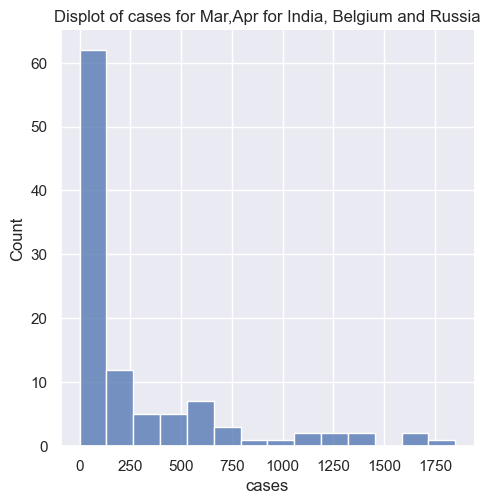

In [113]:
sns.displot(data=df_3c_mar_apr,x='cases')
plt.title('Displot of cases for Mar,Apr for India, Belgium and Russia')
plt.show()

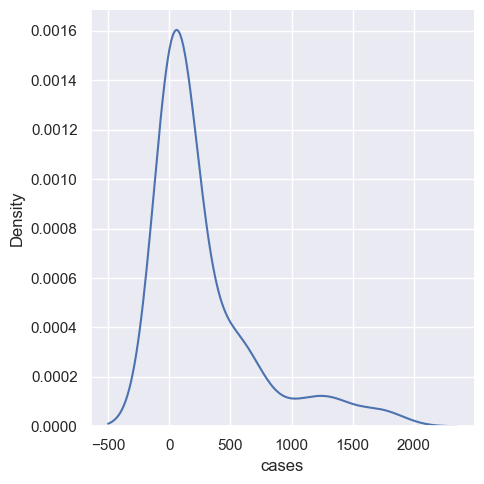

In [114]:
sns.displot(data=df_3c_mar_apr,x='cases',kind='kde')
plt.show()

### Countplot
Show the counts of observations in each categorical bin using bars

Syntax<br>
<b>sns.countplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>


#### Plot a countplot for month

In [115]:
df['month'].value_counts()

month
3     3815
1     2077
2     1943
4     1205
12      67
Name: count, dtype: int64

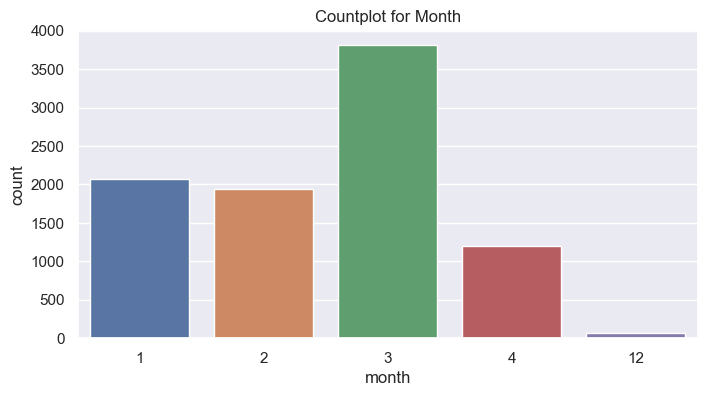

In [116]:
sns.countplot(data=df ,x = 'month')
plt.title('Countplot for Month')
plt.show()

#### Plot a countplot for month based on countries - India, Belgium and Russia as chart legends using hue parameter

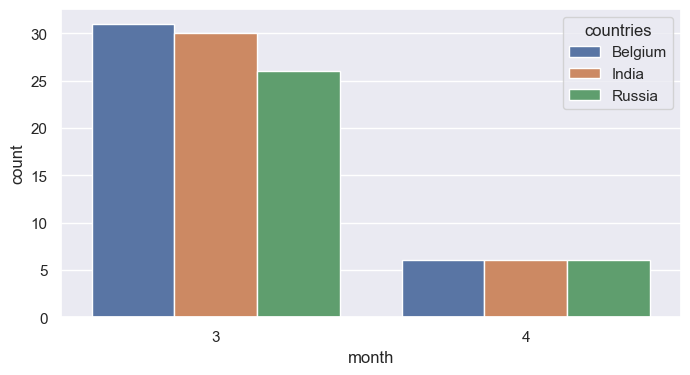

In [117]:
sns.countplot(data=df_3c_mar_apr ,x ='month',hue='countries')
plt.show()

In [ ]:
# scatterplot
# barplot
# lineplot
# boxplot
# violinplot
# Striplot
# swarmplot
# displot
# countplot

In [118]:
# Extracting Quarter column from the data column which is in object data type
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [119]:
df['qtr'].value_counts()

qtr
1    7835
2    1205
4      67
Name: count, dtype: int64

In [120]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

In [121]:
df.shape

(9107, 11)

### KDE Plot
1) KDE stands for Kernel Density Estimate<br>
2) It plots a univariate or bivariate distributions using kernel density estimation.<br>

Syntax<br>
<b>sns.kdeplot(data,x,y,hue,palette)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors<br>
palette - used to determine the color palette to be used for the plot<br>

#### Depict KDE plot for the cases

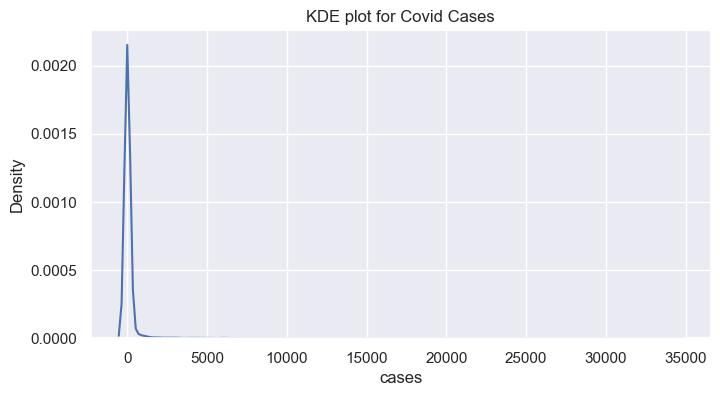

In [122]:
sns.kdeplot(data=df,x='cases')
plt.title('KDE plot for Covid Cases')
plt.show()

#### Depict KDE plot for the cases for the month of Mar and Apr as hue

In [123]:
# Extratcing data for the month of Mar and Apr
df_mar_apr = df[df['month'].isin([3,4])]  
df_mar_apr['month'].value_counts()

month
3    3815
4    1205
Name: count, dtype: int64

In [ ]:
df_mar_apr.shape

(5020, 11)

In [ ]:
df_mar_apr.shape

(5020, 11)

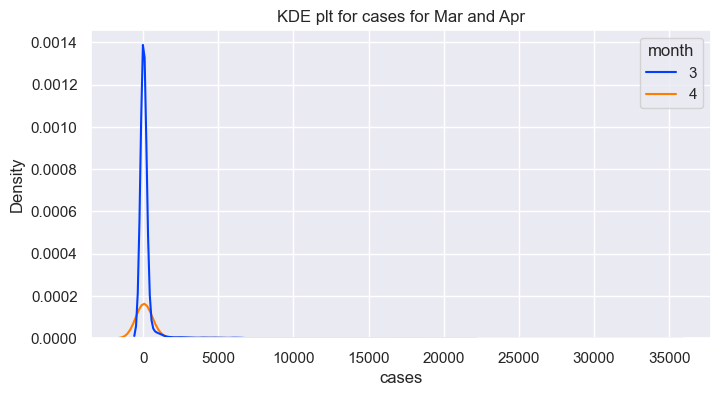

In [124]:
sns.kdeplot(data=df_mar_apr,x='cases',hue='month',palette='bright')
plt.title('KDE plt for cases for Mar and Apr')
plt.show()

### Histplot
It is used to Plot univariate or bivariate histograms to show distributions of datasets.

Syntax<br>
<b>sns.histplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>


#### Plot histplot for cases for the Countries - India, Belgium and Russia for the months inlcuding Mar and Apr

In [125]:
df_3c = df[df['countries'].isin(['India','Belgium','Russia'])]
df_3c.shape

(288, 11)

In [126]:
df_3c['countries'].value_counts()

countries
Belgium    98
India      97
Russia     93
Name: count, dtype: int64

In [127]:
# Filtering or Extracting the data from df_3c for the months of Mar and Apr
df_3c_mar_apr = df_3c[df_3c['month'].isin([3,4])]
df_3c_mar_apr.shape

(105, 11)

In [128]:
df_3c_mar_apr['month'].value_counts()

month
3    87
4    18
Name: count, dtype: int64

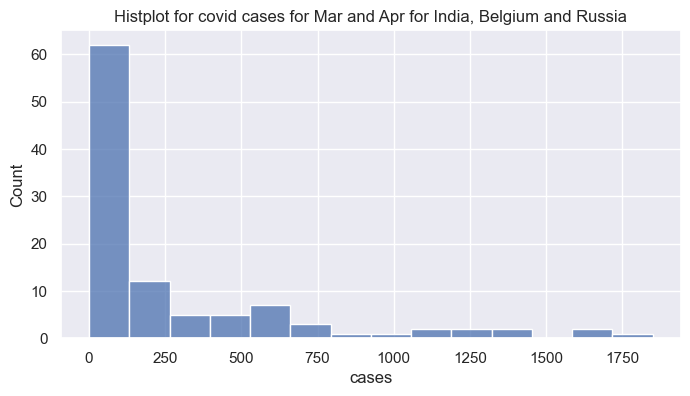

In [129]:
sns.histplot(data=df_3c_mar_apr,x='cases')
plt.title('Histplot for covid cases for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for cases for the Countries - India, Belgium and Russia for the months inlcuding Mar and Apr where month is set as hue parameter

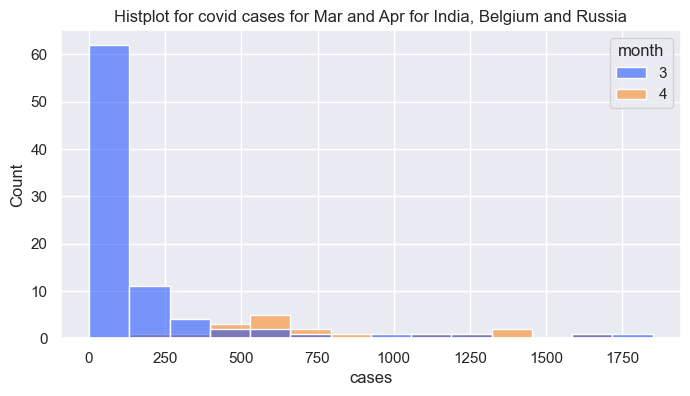

In [130]:
sns.histplot(data=df_3c_mar_apr,x='cases',hue='month',palette='bright')
plt.title('Histplot for covid cases for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for deaths for the Countries - India, Belgium and Russia for the month Mar and Apr

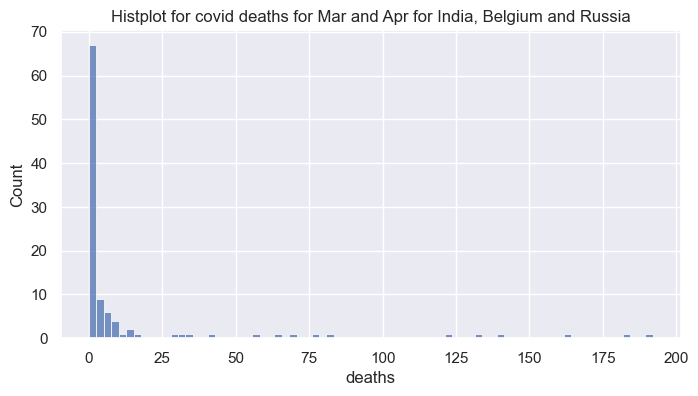

In [131]:
sns.histplot(data=df_3c_mar_apr,x='deaths')
plt.title('Histplot for covid deaths for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for deaths for the Countries - India, Belgium and Russia for the month Mar and Apr where month is set as hue parameter

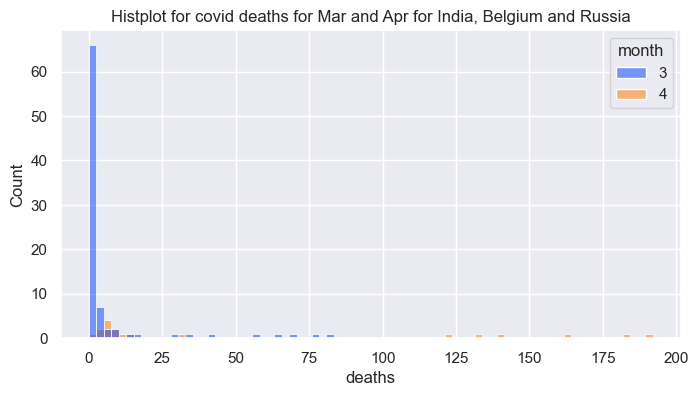

In [132]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='month',palette='bright')
plt.title('Histplot for covid deaths for Mar and Apr for India, Belgium and Russia')
plt.show()

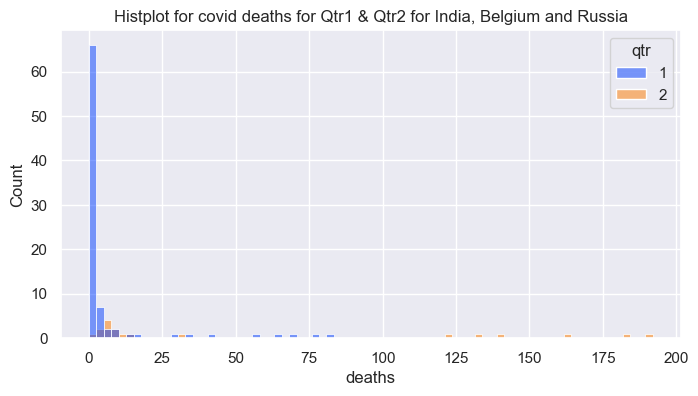

In [133]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='qtr',palette='bright')
plt.title('Histplot for covid deaths for Qtr1 & Qtr2 for India, Belgium and Russia')
plt.show()

### Heatmap

It is used to represent correlation

Syntax<br>
<b>sns.heatmap(data,annot,cmap)</b><br>
data - The correlation matrix<br>
annot - True or False. Whether or not to display te values in heatmap<br>
cmap - color palette<br>

#### Plot the correlation matrix on heatmap excluding the column year

In [ ]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

In [134]:
df1 = df.iloc[:,[1,2,4,5,10]]
df1.columns

Index(['day', 'month', 'cases', 'deaths', 'qtr'], dtype='object')

In [135]:
corr = df1.corr()
corr

,day,month,cases,deaths,qtr
day,1.000000,-0.040470,-0.002845,-0.016463,-0.330084
month,-0.040470,1.000000,0.077225,0.081421,0.755988
cases,-0.002845,0.077225,1.000000,0.755922,0.067657
deaths,-0.016463,0.081421,0.755922,1.000000,0.085825
qtr,-0.330084,0.755988,0.067657,0.085825,1.000000


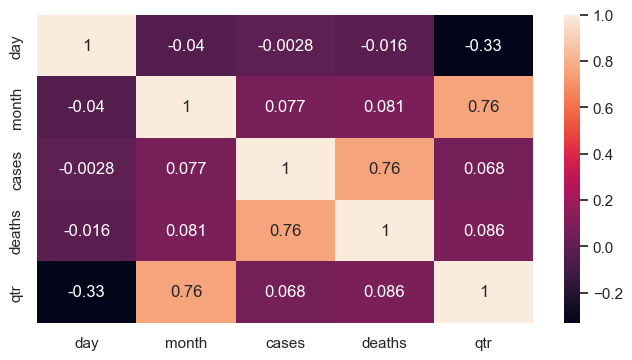

In [136]:
sns.heatmap(data=corr,annot=True)
plt.show()

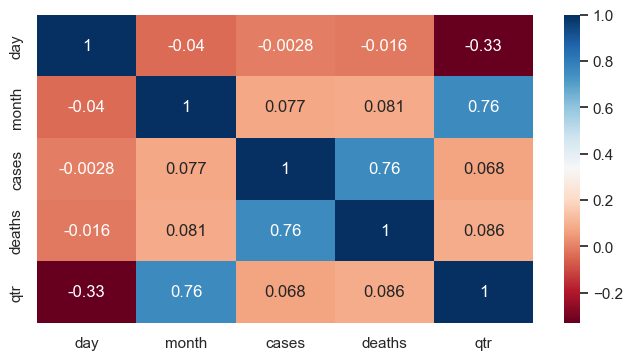

In [137]:
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.show()

In [138]:
corr_cd = df.iloc[:,[4,5]].corr()
corr_cd

,cases,deaths
cases,1.000000,0.755922
deaths,0.755922,1.000000


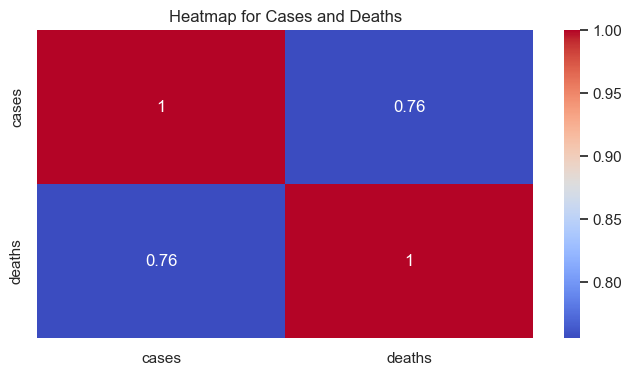

In [139]:
sns.heatmap(data=corr_cd,annot=True,cmap='coolwarm')
plt.title('Heatmap for Cases and Deaths')
plt.show()

### Jointplot
It is used to depict a plot of two variables with bivariate and univariate graphs.<br>
It is a combination of scatterplot and histogram <br>

Syntax<br>
<b>sns.jointplot(data,x,y,hue,color,kind)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>
color - used to set the color of the jointplot<br>
kind - used to set the kinf of jointplot that we want to represent i.e. scatter, kde, hex etc<br>

#### Plot a jointplot between cases and deaths for the the countries - India, Belgium and Russia for the months inlcuding Mar and Apr

In [140]:
df_3c_mar_apr['countries'].value_counts()

countries
Belgium    37
India      36
Russia     32
Name: count, dtype: int64

In [141]:
df_3c_mar_apr['month'].value_counts()

month
3    87
4    18
Name: count, dtype: int64

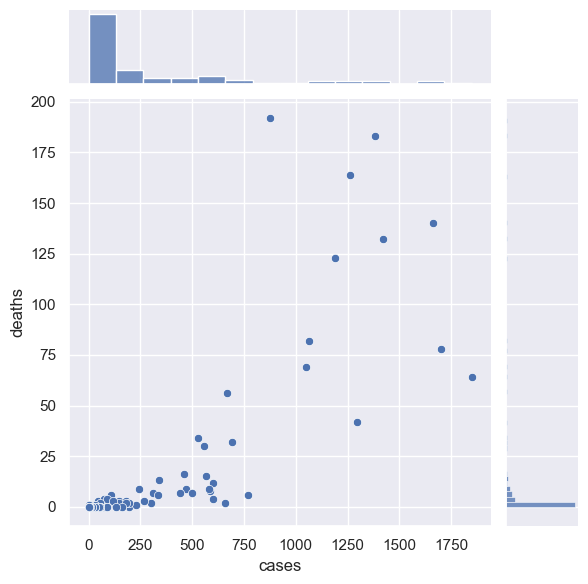

In [142]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths')
plt.show()

#### Plot a jointplot between cases and deaths for the the countries - India, Belgium and Russia for the months inlcuding Mar and Apr where month is set as hue parameter

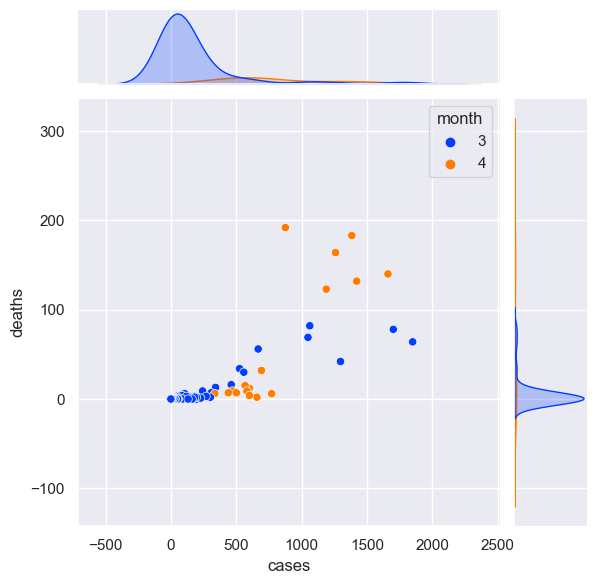

In [143]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright')
plt.show()

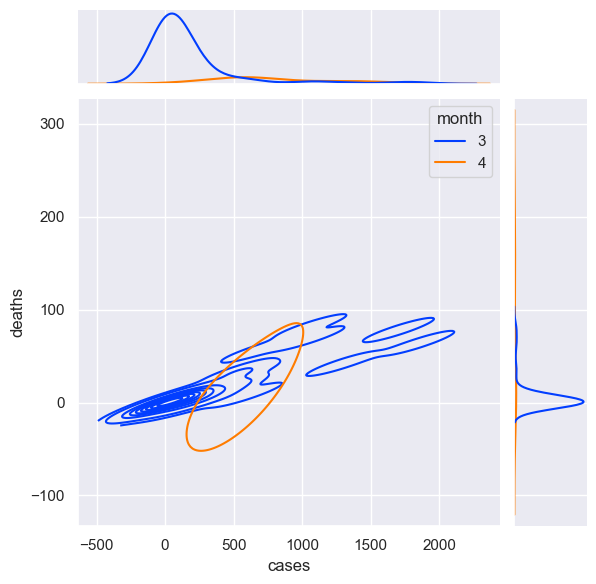

In [144]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright',kind='kde')
plt.show()

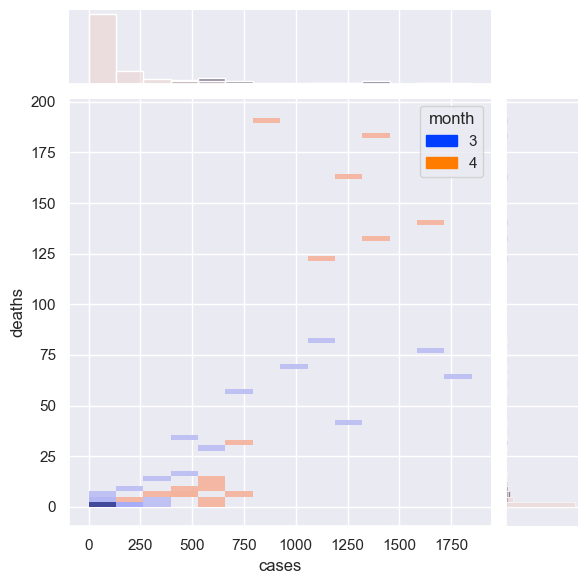

In [145]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright',kind='hist')
plt.show()

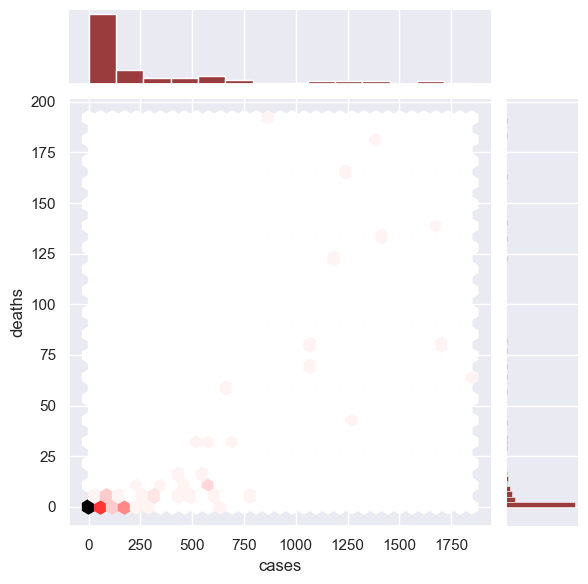

In [146]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',palette='bright',
              kind='hex',color='maroon')
plt.show()